In [20]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as pl
import numpy as np

from openeye.oechem import *
import oenotebook as oenb

In [21]:
# import data
data = pd.read_pickle("infinite_dilution_activity_data.pickle")

In [22]:
data.head()

,solutes,solvents,DG_solv,dDG_solv,DG_selfsolv,dDG_selfsolv,temperature,calc_kTlog_idac,dcalc_kTlog_idac,expt_kTlog_idac,d_expt_kTlog_idac
0,CS(=O)C,ClC(Cl)=C(Cl)Cl,-3.538082,0.076863,-7.446608,0.110383,298.00,3.908525,0.611956,1.826774,0.1
1,CO,c1ccncc1,-3.559755,0.080650,-3.965113,0.089691,298.15,0.405358,0.583680,-0.341777,NaN
2,COC,c1ccccc1,-2.498030,0.086817,-2.793950,0.053573,279.95,0.295920,0.529887,-0.464866,0.03
3,CO,Cc1ccncc1,-3.329972,0.079335,-3.965113,0.089691,298.15,0.635141,0.581422,-0.524098,NaN
4,CCC,C=Cc1ccccc1,-1.504559,0.075084,-2.005266,0.048330,270.07,0.500708,0.496818,0.755752,0.03


In [23]:
# figure out which kTlog(gamma) differ by more then 1.0 kcal/mol from experiment
diff = abs(data.calc_kTlog_idac - data.expt_kTlog_idac)
diff_idx = diff[diff > 1.0]

In [24]:
print("abs(kT log(gamma_exp) - kT log(gamma_calc)) > 1.0 == {0} out of {1}".format(len(diff_idx),len(diff)))

abs(kT log(gamma_exp) - kT log(gamma_calc)) > 1.0 == 92 out of 217


(-3.0, 8.1)

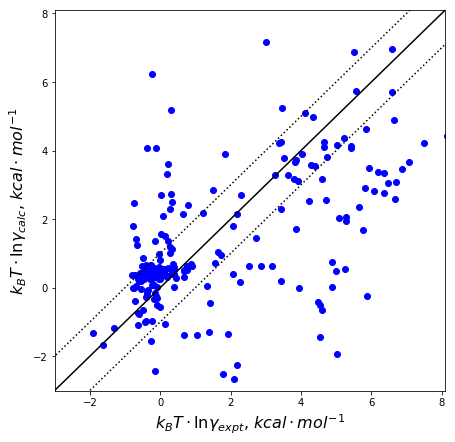

In [25]:
fig = pl.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.plot(data.expt_kTlog_idac, data.calc_kTlog_idac, 'bo')
ax.plot([-10.0,10.0], [-10.,10.], 'k-') # y = x
ax.plot([-10.0,9.0], [-9.,10.], 'k:') # y = x - 1
ax.plot([-10.0,11.0], [-11.,10.], 'k:') # y = x + 1
ax.set_xlabel(r"$k_BT \cdot \ln{\gamma_{expt}}$, $kcal\cdot mol^{-1}$", fontsize=16)
ax.set_ylabel(r"$k_BT \cdot \ln{\gamma_{calc}}$, $kcal\cdot mol^{-1}$", fontsize=16)
ax.set_xlim([-3.0,8.1])
ax.set_ylim([-3.0,8.1])

#ax.set_xlim([min(list(data.expt_kTlog_idac))-0.3, max(list(data.expt_kTlog_idac))+0.3])
#ax.set_ylim([min(list(data.calc_kTlog_idac))-0.3, max(list(data.calc_kTlog_idac))+0.3])


In [26]:
data[data.solutes == 'CCCCO']

,solutes,solvents,DG_solv,dDG_solv,DG_selfsolv,dDG_selfsolv,temperature,calc_kTlog_idac,dcalc_kTlog_idac,expt_kTlog_idac,d_expt_kTlog_idac
193,CCCCO,[H]O[H],-3.156968,0.114458,-3.363938,0.086911,303.15,0.206970,0.634615,3.443776,0.0192308
206,CCCCO,CCCCCCCCCCCC(O)=O,-4.697136,0.179861,-5.176619,0.128155,314.24,0.479483,0.784878,0.057324,0.04
230,CCCCO,CCCCCCC(C)=O,-5.489113,0.126185,-5.987880,0.142704,303.14,0.498767,0.733333,0.686422,0.025


In [27]:
data[data.solutes == 'Cc1ccccc1']

,solutes,solvents,DG_solv,dDG_solv,DG_selfsolv,dDG_selfsolv,temperature,calc_kTlog_idac,dcalc_kTlog_idac,expt_kTlog_idac,d_expt_kTlog_idac
23,Cc1ccccc1,NC=O,-2.841753,0.130911,-4.557528,0.073432,298.00,1.715775,0.639285,3.869848,0.0493827
133,Cc1ccccc1,[H]O[H],-0.885270,0.105905,-3.982142,0.072957,288.15,3.096872,0.598100,8.544096,0.05
197,Cc1ccccc1,CCCCCCCCCCCC(O)=O,-3.640556,0.201502,-4.289573,0.073949,314.10,0.649017,0.742228,-0.409948,0.04


In [28]:
def kcal_to_kBT(energy_value, temperature):
    """ Converts energy values from kcal/mol to kT

        VARIABLE          I/O         Type        Description
        ----------------------------------------------------------------------------
        energy_value      input       float       Energy in kcal/mol
        temperature       input       float       Temperature in kelvin
        new_energy_value  output      float       Energy in kBT

    """
    kB = 0.238846 * 1.3806488 * 6.02214129/ 1000.0 # Boltzmann's constant (kcal/mol/K)
    beta = 1./(kB * temperature)
    new_energy_value = energy_value * beta
    return new_energy_value

def calculate_kTlog_gamma(gamma_expt):
    """ Calculates kT log(gamma) from the experimental value
    """  
    
    return np.log(gamma_expt)

In [10]:
# butan-1-ol in water, 303.15 K
prev =  

6.56332853565364